In [1]:
import pandas as pd
json_df = pd.read_json("dim_customer.json")
df = pd.read_csv("fct_invoice.csv")

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  int64  
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   payment_method  99457 non-null  object 
 6   invoice_date    99457 non-null  object 
 7   shopping_mall   99457 non-null  object 
 8   sales           99457 non-null  float64
 9   age             59352 non-null  float64
 10  year            99457 non-null  int64  
 11  month           99457 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 9.1+ MB
None


Easy 1

In [3]:
print(len((df["customer_id"].unique())))

5191


Easy 2

In [4]:
print(df["category"].unique())
print(f'Unique Categories: {len(df["category"].unique())}')

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Unique Categories: 8


Easy 3

In [5]:
print(df['payment_method'].value_counts())
print("The most popular method is cash, used 44447 times.")

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
The most popular method is cash, used 44447 times.


Medium 1

In [29]:
sale = df['quantity'] * df['price']
df['sales'] = sale

In [30]:
categories = df['category'].unique()
for j in range(0,len(categories)):
    values = sum(df['sales'][df['category'] == categories[j]])
    print(f'{categories[j]}: {values}')


Clothing: 113996791.03997
Shoes: 66553451.47000195
Books: 834552.8999999997
Cosmetics: 6792862.8999999715
Food & Beverage: 849535.0500000005
Toys: 3980426.239999814
Technology: 57862350.0
Souvenir: 635824.6499999914


The categories with the most sales are Clothing, Shoes, and Technology.

Medium 2 

In [26]:
ages = []
for i in range(0,len(df)):
    currentid = df._get_value(i,'customer_id')
    age = json_df[json_df['id'] == currentid]['age'].values[0]
    ages.append(age)

df['age'] = ages

In [28]:
age45 = sum(df['sales'][df['age'] > 45])
print(f'Sales by ages 45 and up: {age45}')

Sales by ages 45 and up: 82039768.14999609


Medium 3 

In [111]:

import datetime
df['year'] = pd.DatetimeIndex(df["invoice_date"],dayfirst=True).year
df['month'] = pd.DatetimeIndex(df["invoice_date"],dayfirst=True).month

years = [2021,2022,2023]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

mysales = []

for i in years:
    for j in months:
        monthsum = sum(df['sales'][df['year'] == i][df['month'] == j])
        mysales.append(monthsum)

y21sales = mysales[0:12]
y22sales = mysales[12:24]
y23sales = mysales[24:36]


<function matplotlib.pyplot.show(close=None, block=None)>

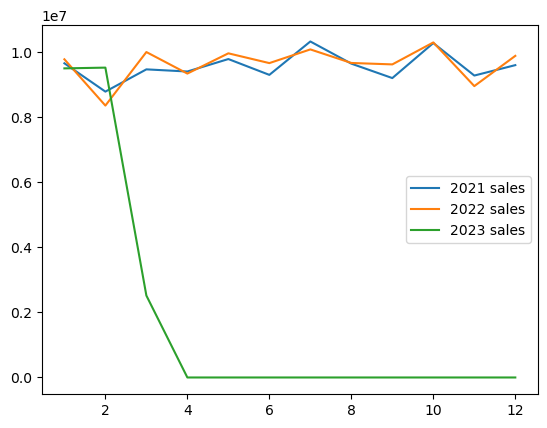

In [116]:
import matplotlib.pyplot as plt
plt.plot(months,y21sales,label='2021 sales')
plt.plot(months,y22sales,label='2022 sales')
plt.plot(months,y23sales,label='2023 sales')
plt.legend()
plt.show

Months 3, 5, 7, 12 show an increase in sales from the last month. 2023 can't be used for information as there are only 3 months worth of data (with March being incomplete). Overall, there is a trend of sales in a zigzag-like motion.

Hard 1

In [117]:
bins = [10,20,30,40,50,60,70,80,90]
df['Range'] = pd.cut(df['age'],bins,right=False)

In [118]:
pd.pivot_table(df,values='sales',columns='category',index='Range',aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
Range,,,,,,,,
"[10, 20)",12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
"[20, 30)",79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
"[30, 40)",84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
"[40, 50)",87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
"[50, 60)",74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
"[60, 70)",80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
"[70, 80)",54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
"[80, 90)",26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
